In [2]:
import matplotlib as mpl
from pylab import *
from matplotlib import cm
import imageio
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from IPython.display import Image, Math, Latex, display

Defined functions are modified to use pulse_sequence directly. 

Coupling strength 'Rabi=[,]' is fixed.

Two atoms are initiated at excited state.

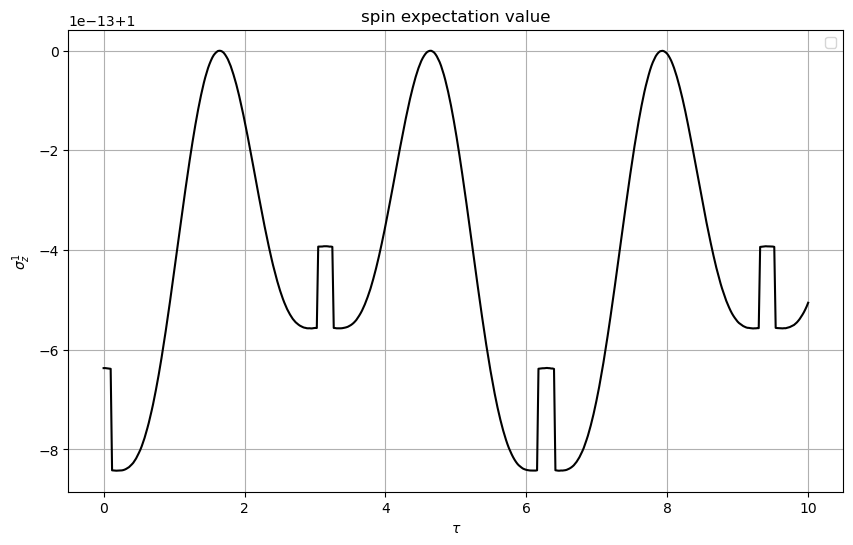

In [3]:
def qsum(op_list):
    op = op_list[0]*0
    for op_i in op_list:
        op += op_i
    return op

class N_dipole_system:
    def __init__(self, N):
        # Number of atoms
        self.N = N

        ### annihilation operators ###
        idatom = qeye(2)  # identity operator
        sm = projection(2, 0, 1)  # |1><0| for an Ns-state system

        self.sm_list = []
        for i in range(N):
            op_list = [idatom] * N
            op_list[i] = sm
            self.sm_list.append(tensor(op_list))
        self.sz_list = [
            - sm.dag() * sm + sm * sm.dag() for sm in self.sm_list
        ]

        ### initial states ###
        self.ket_excited = tensor([basis(2,1) for _ in range(self.N)])
        self.ket_ground = tensor([basis(2,0) for _ in range(self.N)])

        # total spin operators
        self.id_tot = tensor([qeye(2)] * N)
        self.sm_tot = self.ket_ground * self.ket_excited.dag()
        self.sp_tot = self.sm_tot.dag()
        self.sz_tot = self.sp_tot * self.sm_tot - self.sm_tot * self.sp_tot
        self.sx_tot = self.sp_tot + self.sm_tot

        # list of states
        self.states = []
        self.H = []
        self.Rabi = []  # rabi frequency

    def pulse_sequence(self, tau, theta_list, e_op=None, points_pulse=2, points_evolve=2):
        if e_op is None:
            e_op = self.ket_excited * self.ket_excited.dag()
        self.states = [self.ket_excited]
        for n, theta in enumerate(theta_list):
            duration = [theta[0]/self.Rabi[0], theta[1]/self.Rabi[1]]
            time = max(duration)
            self.evolve_pulse(time, points_pulse, Omega=theta)
            if n != len(theta_list) - 1:
                self.evolve(np.linspace(0,tau,points_evolve))
        return expect(e_op, self.states[-1])

    def evolve_pulse(self, t, points, Omega=None, c_ops=[]):
        if Omega==None:
            Omega = [1] * self.N
        H = 0
        for i, sm in enumerate(self.sm_list):
            H += self.Rabi[i]/2*(sm + sm.dag())
        psi0 = self.states[-1]
        duration = [Omega[0]/self.Rabi[0], Omega[1]/self.Rabi[1]]
        time = min(duration)
        time_left = t - time
        self.states += mesolve(H, psi0, np.linspace(0,time,points), c_ops=c_ops).states
        H -= self.Rabi[duration.index(min(duration))]/2*(sm + sm.dag())
        self.states += mesolve(H, self.states[-1], np.linspace(0,time_left,points), c_ops=c_ops).states
        return self.states[-1]

    def evolve(self, tlist, c_ops=[]):
        psi0 = self.states[-1]
        self.states += mesolve(self.H, psi0, tlist, c_ops=c_ops).states
        return self.states[-1]



tlist = np.linspace(0, 10, 500)
omega = [1,1]
sys = N_dipole_system(2)
sys.H = omega[0]/2*sys.sz_list[0] + omega[1]/2*sys.sz_list[1] + 1*sys.sz_list[0]*sys.sz_list[1]
# sys.states = [sys.ket_excited]  # initial state
sys.Rabi = [1,1]

observable = sys.sz_list[0]

## [np.pi/2, 0] means first atom has half pi pulse and second atom has nothing. Only 2 atoms case. Can not handle more atoms case.
obeservables = [sys.pulse_sequence(t, [[np.pi/2, 0], [0, np.pi], [np.pi/2, 0]]) for t in tlist]

plt.figure(figsize=(10,6))
plt.plot(tlist, obeservables, color='black')
plt.grid(True)
plt.title('spin expectation value')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\sigma^{1}_{z}$')
plt.legend(loc='upper right')

In [28]:
observables

[[0.9999999999995709],
 [-0.9972057713939457],
 [0.9793855417947429],
 [-0.9184809531011127],
 [0.7827525944921141],
 [-0.5347830702508143],
 [0.16452014952676275],
 [0.2948777056771151],
 [-0.7361550699994466],
 [0.9775280731577415],
 [-0.8470928152399073],
 [0.28741279888608007],
 [0.4741005704865625],
 [-0.9540512511511592],
 [0.718176321089226],
 [0.16579582393203163],
 [-0.913072094218485],
 [0.6589579289704706],
 [0.4089941853856914],
 [-0.9349946815090676],
 [0.0852208757937788],
 [0.9025677979921852],
 [-0.3249277484029472],
 [-0.8521059055631549],
 [0.31863998718030306],
 [0.8783102873554155],
 [-0.07580475306942608],
 [-0.8821409430146567],
 [-0.3910900180582886],
 [0.5964473996683404],
 [0.8343875636624981],
 [0.16291578403667656],
 [-0.6233812379997219],
 [-0.8299471874011392],
 [-0.42559403170949117],
 [0.22064824942952804],
 [0.6955739823116014],
 [0.8007433869978497],
 [0.6154235358502416],
 [0.2598873572074123],
 [-0.10041216228221705],
 [-0.38421764750900517],
 [-0.578

Defined functions are not modified.

Time of pulse is set to be 1 and Rabi frequency changes according to pulse length (e.g., pi/2).

Two atoms are initiated at excited state.

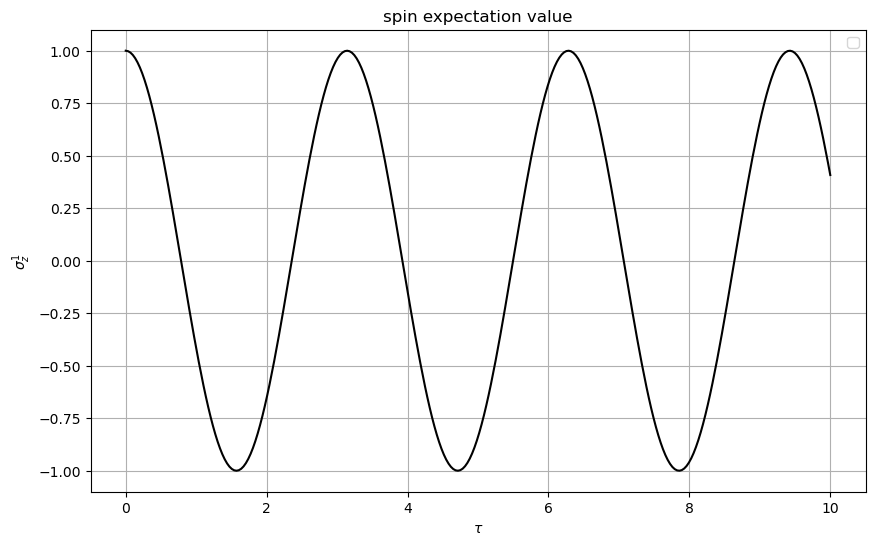

In [18]:
def qsum(op_list):
    op = op_list[0]*0
    for op_i in op_list:
        op += op_i
    return op

class N_dipole_system:
    def __init__(self, N):
        # Number of atoms
        self.N = N

        ### annihilation operators ###
        idatom = qeye(2)  # identity operator
        sm = projection(2, 0, 1)  # |1><0| for an Ns-state system

        self.sm_list = []
        for i in range(N):
            op_list = [idatom] * N
            op_list[i] = sm
            self.sm_list.append(tensor(op_list))
        self.sz_list = [
            - sm.dag() * sm + sm * sm.dag() for sm in self.sm_list
        ]


        ### initial states ###
        self.ket_excited = tensor([basis(2,1) for _ in range(self.N)])
        self.ket_ground = tensor([basis(2,0) for _ in range(self.N)])

        # total spin operators
        self.id_tot = tensor([qeye(2)] * N)
        self.sm_tot = self.ket_ground * self.ket_excited.dag()
        self.sp_tot = self.sm_tot.dag()
        self.sz_tot = self.sp_tot * self.sm_tot - self.sm_tot * self.sp_tot
        self.sx_tot = self.sp_tot + self.sm_tot

        # list of states
        self.states = []
        self.times = [0]
        self.H = []

    def pulse_sequence(self, tau, theta_list, e_op=None, points_pulse=2, points_evolve=2):
        if e_op is None:
            e_op = self.ket_excited * self.ket_excited.dag()
        self.states = [self.ket_excited]
        self.times = [0]
        for n, theta in enumerate(theta_list):
            self.evolve_pulse(np.linspace(0,1,points_pulse), Omega=[theta]*self.N)
            if n != len(theta_list) - 1:
                self.evolve(np.linspace(0,tau,points_evolve))
        return expect(e_op, self.states[-1])

    def evolve_pulse(self, tlist, Omega=None, c_ops=[]):
        if Omega==None:
            Omega = [1] * self.N
        H = self.H * 0
        for i, sm in enumerate(self.sm_list):
            H += Omega[i]/2*(sm + sm.dag())
        psi0 = self.states[-1]
        self.states += mesolve(H, psi0, tlist, c_ops=c_ops).states
        self.times += list(np.array(tlist) + self.times[-1])
        return self.states[-1]

    def evolve(self, tlist, c_ops=[]):
        psi0 = self.states[-1]
        self.states += mesolve(self.H, psi0, tlist, c_ops=c_ops).states
        self.times += list(np.array(tlist) + self.times[-1])
        return self.states[-1]
    
    def animate_bloch(self, fname, duration=1, save_all=False):
        n_states_to_plot = 10
        b = Bloch()
        b.vector_color = list(cm.Set1(np.linspace(0, 1, 9)))
        b.view = [-40,30]
        images=[]
        length = len(self.states)

        ### customize the Bloch sphere ###
        nrm = mpl.colors.Normalize(0,n_states_to_plot+1)
        colors = cm.autumn(nrm(range(n_states_to_plot+1))) # options: cool, summer, winter, autumn etc.
        color_list = [mpl.colors.rgb2hex(c) for c in colors for _ in range(self.N)] # options: 'r', 'g', 'b' etc.
        b.point_color = color_list #['#000000']
        b.point_marker = ['o']
        b.point_size = [30]

        for i in range(length):
            b.clear()
            b.add_states([self.states[i].ptrace(j) for j in range(self.N)])
            for j in range(max(0, i-n_states_to_plot), i+1):
                b.add_states([self.states[j].ptrace(n) for n in range(self.N)],'point')
            if save_all:
                b.save(dirc='tmp') #saving images to tmp directory
                filename="tmp/bloch_%01d.png" % i
            else:
                filename='temp_file.png'
                for _ in range(3):
                    try:
                        b.save(filename)
                        break
                    except:
                        print("Error making bloch sphere at t = ", self.times[i])
            images.append(imageio.imread(filename))
        imageio.mimsave(fname, images, duration=duration)


tlist = np.linspace(0, 10, 300)
omega = [1,1]
sys = N_dipole_system(2)
sys.H = omega[0]/2*sys.sz_list[0] + omega[1]/2*sys.sz_list[1] +  1*sys.sz_list[0]*sys.sz_list[1]
sys.states = [sys.ket_excited]  # initial state

e_op = sys.sz_list[0] 
# e_op = sys.ket_excited * sys.ket_excited.dag()
observables = []
    
for t in tlist:
    sys.states = [sys.ket_excited]  # initial state
    sys.evolve_pulse(np.linspace(0,1,2), Omega=[np.pi/2, 0])  # evolve with a Rabi frequency pi/2 for the times in tlist - Omega=pi/2 for t=0->1 is equivalent to a pi/2-pulse
    sys.evolve(np.linspace(0,t,2))
    sys.evolve_pulse(np.linspace(0,1,2), Omega=[0, np.pi])
    sys.evolve(np.linspace(0,t,2))
    sys.evolve_pulse(np.linspace(0,1,2), Omega=[np.pi/2, 0])
    observables.append([expect(e_op, sys.states[-1])])

plt.figure(figsize=(10,6))
plt.plot(tlist, observables, color='black')
plt.grid(True)
plt.title('spin expectation value')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\sigma^{1}_{z}$')
plt.legend(loc='upper right')

C:\Users\chris\AppData\Local\Temp\ipykernel_10256\1624107150.py:102: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


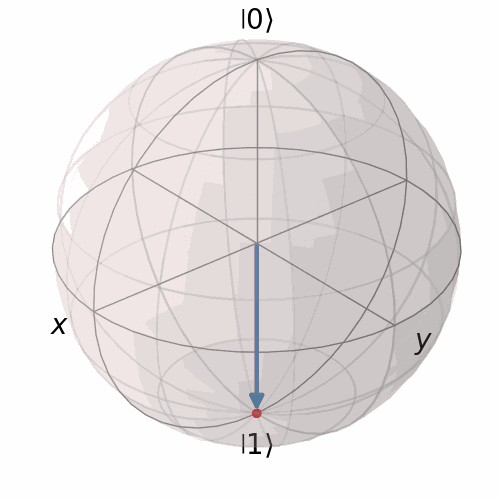

In [19]:
sys.states = [sys.ket_excited]  # initial state
sys.evolve_pulse(np.linspace(0,1,5), Omega=[np.pi/2, 0])  # evolve with a Rabi frequency pi/2 for the times in tlist - Omega=pi/2 for t=0->1 is equivalent to a pi/2-pulse
sys.evolve(np.linspace(0,t,10))
sys.evolve_pulse(np.linspace(0,1,5), Omega=[0, np.pi])
sys.evolve(np.linspace(0,t,10))
sys.evolve_pulse(np.linspace(0,1,5), Omega=[np.pi/2, 0])

sys.animate_bloch('yupeng-1.gif', duration=300)
Image('yupeng-1.gif')

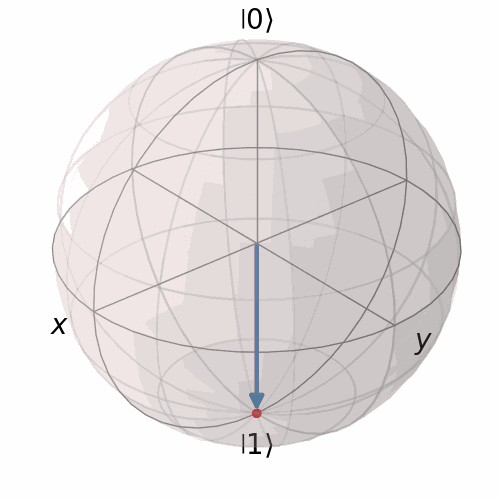

In [21]:
Image('yupeng-1.gif')

In [20]:
observables

[[-0.9999999999979479],
 [-0.9999999999960577],
 [-0.9999999999930531],
 [-0.999999999988645],
 [-0.9999999999817997],
 [-0.9999999999699656],
 [-0.9999999999499795],
 [-0.9999999999373593],
 [-0.9999999999232193],
 [-0.9999999999074639],
 [-0.9999999998891379],
 [-0.9999999998689246],
 [-0.9999999998468377],
 [-0.9999999998228112],
 [-0.9999999997968351],
 [-0.9999999997685316],
 [-0.9999999997382464],
 [-0.9999999997063799],
 [-0.9999999996520829],
 [-0.9999999995938544],
 [-0.999999999532312],
 [-0.9999999994721983],
 [-0.9999999994104867],
 [-0.9999999993467443],
 [-0.9999999992706876],
 [-0.999999999198987],
 [-0.9999999991263653],
 [-0.9999999990503622],
 [-0.9999999989731938],
 [-0.9999999988809661],
 [-0.9999999987886905],
 [-0.9999999986958357],
 [-0.9999999986034196],
 [-0.9999999985128395],
 [-0.9999999984243781],
 [-0.9999999983366906],
 [-0.999999998250638],
 [-0.9999999981674691],
 [-0.9999999980876279],
 [-0.99999999801067],
 [-0.9999999979379963],
 [-0.9999999978935404]